Importing Data

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Pandas options
pd.set_option('display.max_colwidth', 1000, 'display.max_rows', None, 'display.max_columns', None)

# Plotting options
%matplotlib inline
mpl.style.use('ggplot')
sns.set(style='whitegrid')

In [12]:
loans = pd.read_csv(r"C:\Users\DELL\Downloads\loan data.csv")

C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Checkig basic information about data:

In [13]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [14]:
loans.sample(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39400,210784,210596,10000,10000,1152.71,36 months,9.20%,318.93,B,B1,P2 Entertainment,1 year,RENT,77250.0,Not Verified,Jan-08,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=210784,I need to consolidate my credit card debt to avoid high interest and periodic fees.,debt_consolidation,Credit Card Debt Loan,941xx,CA,5.93,0,Nov-94,0,0.0,0.0,10,0,11496,26.60%,20,f,0.0,0.0,11454.74588,1309.82,9999.99,1454.76,0.0,0.0,0.0,Jan-11,120.89,NaN,Mar-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
7573,879585,1094517,7200,7200,7200.00,36 months,6.62%,221.07,A,A2,Town of Millbury,6 years,OWN,74004.0,Source Verified,Sep-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=879585,Borrower added on 09/09/11 > The purpose of this loan is to consolidate several high-interest loans in order to further upcoming educational goals.<br/>,debt_consolidation,Debt Consolidation Loan,015xx,MA,14.97,0,Dec-93,0,26.0,NaN,14,0,9172,12.10%,26,f,0.0,0.0,7834.53197,7834.53,7200.00,634.53,0.0,0.0,0.0,Jul-13,3199.84,NaN,Sep-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
12953,789255,993114,9600,9600,9575.00,36 months,11.99%,318.82,B,B5,MGIC Insurance,7 years,MORTGAGE,62000.0,Source Verified,Jun-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=789255,"Borrower added on 06/19/11 > Loan Purpose: Payoff 2 Capital 1 cards costing me 20% interest with this fixed rate loan in 36 mos. Have $80,000 reserves in Fidelity 401K. All bills monthly on time. Own home 7 years, and 7 yrs on current job.<br/>",credit_card,Capital 1 Refinance,430xx,OH,17.46,1,Oct-82,0,22.0,NaN,10,0,44107,81.10%,19,f,0.0,0.0,11477.15497,11447.27,9600.00,1877.15,0.0,0.0,0.0,Jul-14,319.97,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9119,854866,1067148,20000,20000,19975.00,60 month

We're are trying to make EDA on the `loan_status` variable.

In [16]:
loans['loan_status'].value_counts(dropna=False)

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [17]:
loans = loans.loc[loans['loan_status'].isin(['Fully Paid', 'Charged Off'])]

In [18]:
loans.shape

(38577, 111)

In [19]:
loans['loan_status'].value_counts(dropna=False)

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [20]:
loans['loan_status'].value_counts(normalize=True, dropna=False)

Fully Paid     0.854136
Charged Off    0.145864
Name: loan_status, dtype: float64

About 79% of the remaining loans have been fully paid and 21% have charged off, so we have a somewhat unbalanced classification problem.

calculate the percentage of missing data for each feature if they are in less numbers so we can delete the rows

In [21]:
missing_fractions = loans.isnull().mean().sort_values(ascending=False)

In [22]:
missing_fractions.head(10)

verification_status_joint    1.0
annual_inc_joint             1.0
mo_sin_old_rev_tl_op         1.0
mo_sin_old_il_acct           1.0
bc_util                      1.0
bc_open_to_buy               1.0
avg_cur_bal                  1.0
acc_open_past_24mths         1.0
inq_last_12m                 1.0
total_cu_tl                  1.0
dtype: float64

Let's visualize the distribution of missing data percentages:

Text(0, 0.5, 'Feature count')

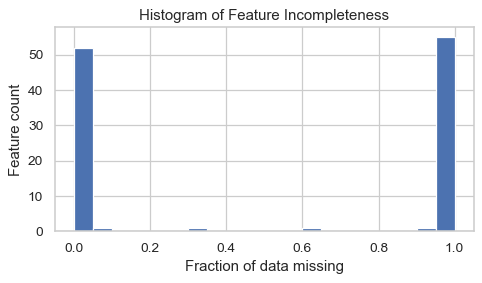

In [23]:
plt.figure(figsize=(6,3), dpi=90)
missing_fractions.plot.hist(bins=20)
plt.title('Histogram of Feature Incompleteness')
plt.xlabel('Fraction of data missing')
plt.ylabel('Feature count')

In [24]:
drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))
print(drop_list)

['acc_open_past_24mths', 'all_util', 'annual_inc_joint', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'desc', 'dti_joint', 'il_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'next_pymnt_d', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'open_acc_6m', 'open_il_12m', 'open_il_24m', 'open_il_6m', 'open_rv_12m', 'open_rv_24m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_coll_amt', 'tot_cur_bal', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bal_il', 'total_bc_limit', 'total_cu_

How many features will be dropped?

In [25]:
len(drop_list)

58

Drop these features:

In [26]:
loans.drop(labels=drop_list, axis=1, inplace=True)

In [27]:
loans.shape

(38577, 53)

Only keep loan features known to potential investors


In [28]:
print(sorted(loans.columns))

['acc_now_delinq', 'addr_state', 'annual_inc', 'application_type', 'chargeoff_within_12_mths', 'collection_recovery_fee', 'collections_12_mths_ex_med', 'delinq_2yrs', 'delinq_amnt', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'funded_amnt', 'funded_amnt_inv', 'grade', 'home_ownership', 'id', 'initial_list_status', 'inq_last_6mths', 'installment', 'int_rate', 'issue_d', 'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 'loan_amnt', 'loan_status', 'member_id', 'open_acc', 'out_prncp', 'out_prncp_inv', 'policy_code', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'pymnt_plan', 'recoveries', 'revol_bal', 'revol_util', 'sub_grade', 'tax_liens', 'term', 'title', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'url', 'verification_status', 'zip_code']


For each of these features, we check the description in the Data Dictionary and only keep the features that would have been available to investors considering an investment in the loan. These include features in the loan application, and any features added by LendingClub when the loan listing was accepted, such as the loan grade and interest rate.


In [29]:
keep_list = ['addr_state', 'annual_inc', 'application_type', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'grade', 'home_ownership', 'id', 'initial_list_status', 'installment', 'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 'mort_acc', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code']

In [30]:
len(keep_list)

31

The list of features to drop is any feature not in `keep_list`:

In [31]:
drop_list = [col for col in loans.columns if col not in keep_list]
print(drop_list)

['member_id', 'funded_amnt', 'funded_amnt_inv', 'pymnt_plan', 'url', 'delinq_2yrs', 'inq_last_6mths', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [32]:
len(drop_list)

25

Drop these features:

In [33]:
loans.drop(labels=drop_list, axis=1, inplace=True)

In [34]:
loans.shape

(38577, 28)

Exploratory Analysis

Steps:
1. Drop the feature if it is not useful for predicting the loan status.
2. View summary statistics and visualize the data, plotting against the loan status.
3. Modify the feature to make it useful for modeling, if necessary.

We define a function for plotting a variable and comparing with the loan status:

In [69]:
def plot_var(col_name, full_name, continuous):
    """
    Visualize a variable with and without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Plot without loan status
    if continuous:
        sns.distplot(loans.loc[loans[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(loans[col_name], order=sorted(loans[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)

    # Plot with loan status
    if continuous:
        sns.boxplot(x=col_name, y='loan_status', data=loans, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name + ' by Loan Status')
    else:
        charge_off_rates = loans.groupby(col_name)['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']
        sns.barplot(x=charge_off_rates.index, y=charge_off_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of Loans Charged-off')
        ax2.set_title('Charge-off Rate by ' + full_name)
    ax2.set_xlabel(full_name)
    
    plt.tight_layout()

Print the remaining features for future reference:

In [36]:
print(list(loans.columns))

['id', 'loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'application_type', 'pub_rec_bankruptcies']


Data Dictionary: "A unique [LendingClub] assigned ID for the loan listing."

In [37]:
loans['id'].sample(5)

29805     517982
3229     1022153
21086     647976
39339     224614
19208     679644
Name: id, dtype: int64

Are all the IDs unique?

In [38]:
loans['id'].describe()

count    3.857700e+04
mean     6.763787e+05
std      2.092639e+05
min      5.473400e+04
25%      5.120330e+05
50%      6.564230e+05
75%      8.291460e+05
max      1.077501e+06
Name: id, dtype: float64

Yes, they are all unique. The ID is not useful for modeling, either as a categorical variable (there are too many distinct values) or as a numerical variable (the IDs vary wildly in magnitude, likely without any significance), so we drop this variable.

In [39]:
loans.drop('id', axis=1, inplace=True)

Data Dictionary: "The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."

In [40]:
loans['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

Loan amounts range from \$500 to \$40,000, with a median of \$12,000.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


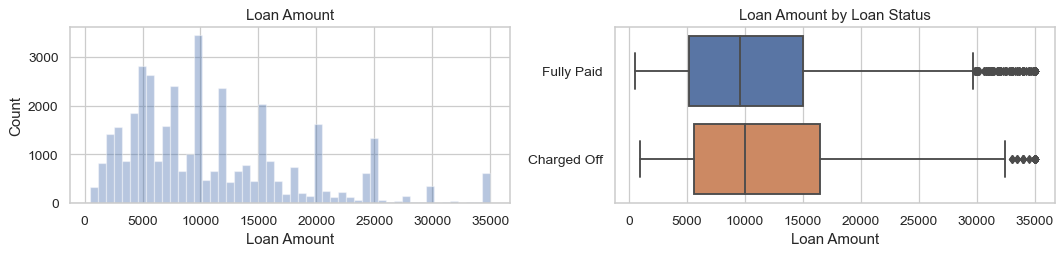

In [41]:
plot_var('loan_amnt', 'Loan Amount', continuous=True)

Charged-off loans tend to have higher loan amounts. Let's compare the summary statistics by loan status:

In [42]:
loans.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,12104.385108,8085.732038,900.0,5600.0,10000.0,16500.0,35000.0
Fully Paid,32950.0,10866.455994,7199.629493,500.0,5200.0,9600.0,15000.0,35000.0


Data Dictionary: "The number of payments on the loan. Values are in months and can be either 36 or 60."

In [43]:
loans['term'].value_counts(dropna=False)

 36 months    29096
 60 months     9481
Name: term, dtype: int64

Convert `term` to integers.

In [44]:
loans['term'] = loans['term'].apply(lambda s: np.int8(s.split()[0]))

In [45]:
loans['term'].value_counts(normalize=True)

36    0.754232
60    0.245768
Name: term, dtype: float64

Compare the charge-off rate by loan period:

In [46]:
loans.groupby('term')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

term
36    0.110909
60    0.253138
Name: loan_status, dtype: float64

About 76% of the completed loans have three-year periods, and the rest have five-year periods. Loans with five-year periods are more than twice as likely to charge-off as loans with three-year periods.

Data Dictionary: "Interest Rate on the loan."

In [47]:
loans['int_rate'].describe()

count      38577
unique       370
top       10.99%
freq         913
Name: int_rate, dtype: object

Interest rates range from 5.32% to 30.99% (!) with a median of 13.1%.

Charged-off loans tend to have much higher interest rates. Let's compare the summary statistics by loan status:

In [49]:
loans.groupby('loan_status')['int_rate'].describe()

,count,unique,top,freq
loan_status,,,,
Charged Off,5627,332,13.49%,127
Fully Paid,32950,360,10.99%,818


Data Dictionary: "The monthly payment owed by the borrower if the loan originates."

In [50]:
loans['installment'].describe()

count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64

Installments range from \$4.93 to \$1,714, with a median of \$377.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


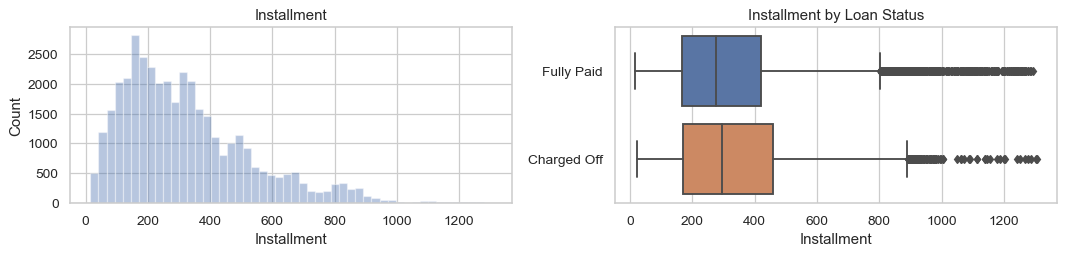

In [51]:
plot_var('installment', 'Installment', continuous=True)

Charged-off loans tend to have higher installments. Let's compare the summary statistics by loan status:

In [52]:
loans.groupby('loan_status')['installment'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,336.175006,217.051841,22.79,168.5550,293.87,457.840,1305.19
Fully Paid,32950.0,320.125232,207.081110,15.69,165.2825,275.65,420.735,1295.21


Loans that charge off have \$30 higher installments on average.

Data Dictionary: "The job title supplied by the Borrower when applying for the loan."

In [53]:
loans['emp_title'].describe()

count       36191
unique      28027
top       US Army
freq          131
Name: emp_title, dtype: object

There are too many different job titles for this feature to be useful, so we drop it.

In [54]:
loans.drop(labels='emp_title', axis=1, inplace=True)

Data Dictionary: "The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER."

In [55]:
loans['home_ownership'].value_counts(dropna=False)

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

Replace the values `ANY` and `NONE` with `OTHER`:

In [56]:
loans['home_ownership'].replace(['NONE', 'ANY'], 'OTHER', inplace=True)

In [57]:
loans['home_ownership'].value_counts(dropna=False)

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER         101
Name: home_ownership, dtype: int64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


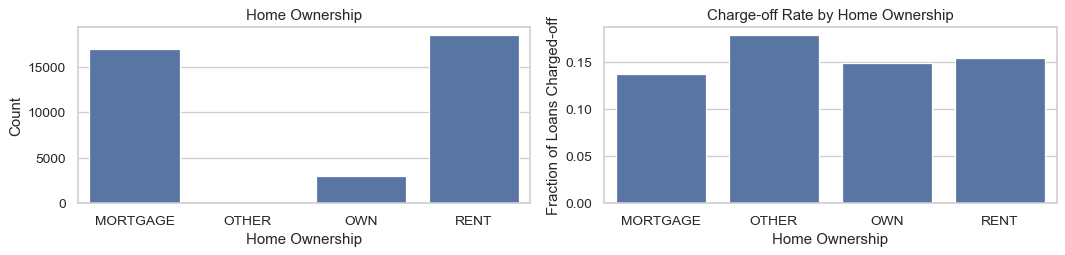

In [58]:
plot_var('home_ownership', 'Home Ownership', continuous=False)

There appear to be large differences in charge-off rates by home ownership status. Renters and homeowners have a higher probability of charge-off. Let's compare the charge-off rates:

In [59]:
loans.groupby('home_ownership')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off']

home_ownership
MORTGAGE    0.136713
OTHER       0.178218
OWN         0.148908
RENT        0.153626
Name: loan_status, dtype: float64

Data Dictionary: "The self-reported annual income provided by the borrower during registration."

In [60]:
loans['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

Annual income ranges from \$0 to \$9,550,000, with a median of \$65,000. Because of the large range of incomes, we should take a log transform of the annual income variable.

In [61]:
loans['log_annual_inc'] = loans['annual_inc'].apply(lambda x: np.log10(x+1))

In [62]:
loans.drop('annual_inc', axis=1, inplace=True)

In [63]:
loans['log_annual_inc'].describe()

count    38577.000000
mean         4.763961
std          0.243124
min          3.602169
25%          4.602071
50%          4.769887
75%          4.913819
max          6.778151
Name: log_annual_inc, dtype: float64

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


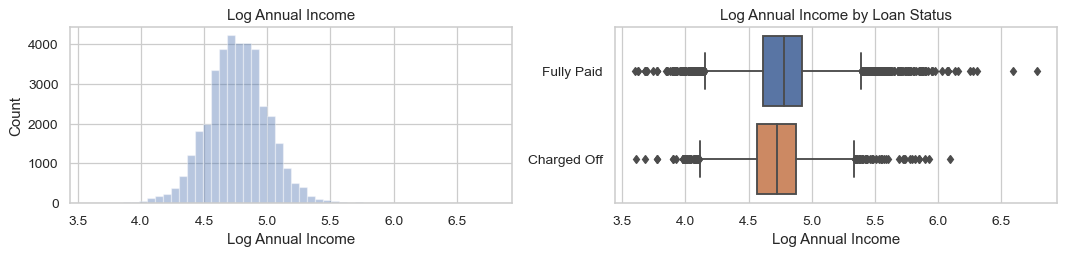

In [64]:
plot_var('log_annual_inc', 'Log Annual Income', continuous=True)

It appears that individuals with higher income are more likely to pay off their loans. Let's compare the summary statistics by loan status:

In [65]:
loans.groupby('loan_status')['log_annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,5627.0,4.723318,0.243179,3.610767,4.568213,4.724284,4.875067,6.096910
Fully Paid,32950.0,4.770901,0.242438,3.602169,4.614198,4.778158,4.924284,6.778151


Data Dictionary: "Indicates if income was verified by [Lending Club], not verified, or if the income source was verified."

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


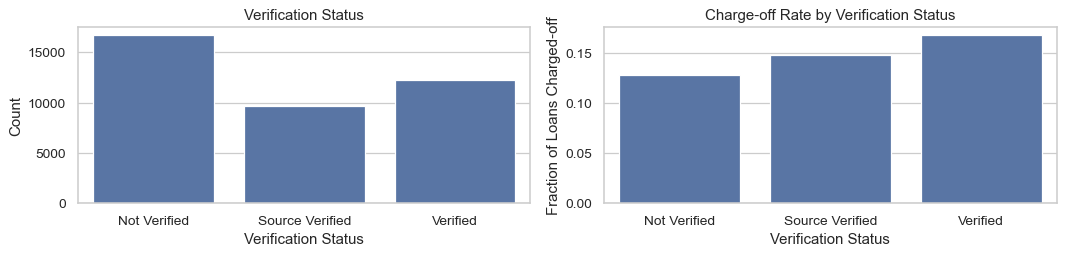

In [66]:
plot_var('verification_status', 'Verification Status', continuous=False)

Data Dictionary: "A category provided by the borrower for the loan request."

In [67]:
loans['purpose'].value_counts()

debt_consolidation    18055
credit_card            5027
other                  3865
home_improvement       2875
major_purchase         2150
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

Calculate the charge-off rates by purpose:

In [68]:
loans.groupby('purpose')['loan_status'].value_counts(normalize=True).loc[:,'Charged Off'].sort_values()

purpose
major_purchase        0.103256
wedding               0.103672
car                   0.106738
credit_card           0.107818
home_improvement      0.120696
vacation              0.141333
debt_consolidation    0.153254
medical               0.155653
moving                0.159722
house                 0.160763
other                 0.163777
educational           0.172308
renewable_energy      0.186275
small_business        0.270810
Name: loan_status, dtype: float64

Notice that only 12% of completed loans for weddings have charged-off, but 30% of completed small business loans have charged-off.